# Aula 4 - Treinamento Machine Learning - FIAP + Alura

## Artificial Intelligence Tools & Examples - Métricas para Avaliação de Modelos

## Prof. Dr. Ahirton Lopes

Ref. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


Nossos imports serão o pandas, o datasets, nosso modelo linear e train_test_split do sckitlearn bem como o matplotlib:

In [12]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Vamos analisar rapidamente as bibliotecas que importamos:

Pandas - para carregar o arquivo de dados como um dataframe do Pandas e analisar os dados;

No Sklearn, importamos o módulo de conjuntos de dados (databases) para carregar uma base de amostra e o linear_model para executar uma regressão linear;

No Sklearn, com a sub-biblioteca model_selection, importamos então train_test_split para que possamos dividir corretamente nossos dados em conjuntos de treinamento e teste;

Do Matplotlib, importamos o pyplot para plotar gráficos dos dados.

In [13]:
# Carregando o dataset 'diabetes'

# Declarando os nomes de nossas colunas
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()

# Carregando o dataset 'diabetes'do sklearn
diabetes = datasets.load_diabetes()

# Carregando o dataset como um pandas dataframe
df = pd.DataFrame(diabetes.data, columns=columns)

#Definindo nossa variável 'alvo' (dependente) como y
y = diabetes.target

In [14]:
# Criando nossos sets de treinamento e teste (Lembre-se, comumente será em uma proporçao de 70/30 ou 80/20)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


Agora, ajustaremos o modelo aos dados de treinamento (model fitting):

In [15]:
# Model fitting
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Como você pode ver, estamos ajustando o modelo nos dados de treinamento e tentando prever os dados de teste.

Vamos ver algumas das previsões:


In [16]:
predictions[0:5]

array([152.97123903, 105.15777097, 187.71685709, 114.53052279,
       164.7942582 ])

Obs: como usamos [0: 5] após as previsões, mostra-se então apenas os cinco primeiros valores previstos.

Remover o [0: 5] faria com que fossem imprimidos todos os valores previstos que nosso modelo criou.

Agora vamos plotar nosso modelo de regressão linear:

Text(0, 0.5, 'Predicoes')

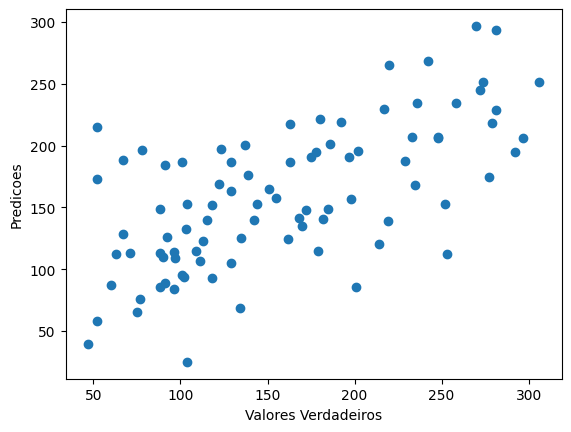

In [17]:
## Modelo de regressao linear
plt.scatter(y_test, predictions)
plt.xlabel('Valores Verdadeiros')
plt.ylabel('Predicoes')

Score de acurácia para nosso modelo:

In [18]:
print ('Score:', model.score(X_test, y_test))

Score: 0.402670159312321


## Exercício de fixação e Desafio - Validação Cruzada, K-Pastas e Leave One Out


**[Desafio]** Como desafio, atentem para a utilização do mesmo exemplo mas dessa vez com a utilização de validação via validação cruzada via K-Pastas (K-Folds Cross Validation)  e, a posteriori, façam o mesmo exemplo dessa vez com validação via Método Leave One Out (como visto em aula).

Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [19]:
# Imports necessários

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [20]:
# Fazendo nossa validação cruzada em 8 k-pastas

scores = cross_val_score(model, df, y, cv=8)
print ('Scores com Validação Cruzada:', scores)

Scores com Validação Cruzada: [0.50283895 0.18991137 0.56539742 0.36996399 0.6004718  0.33262207
 0.41403457 0.68713432]


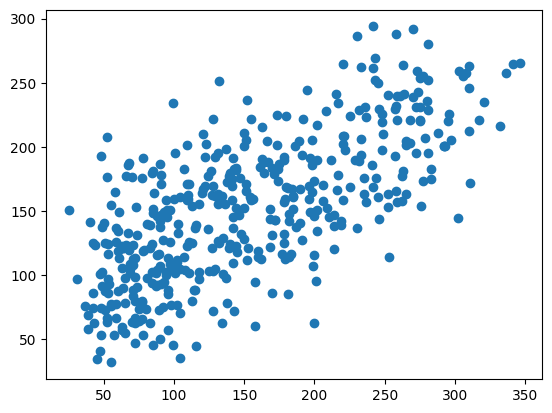

In [21]:
# Fazendo predições com nossa validação cruzada

predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

Podemos ver que nosso plot é bem diferente do original, de nosso exemplo anterior. São oito vezes mais pontos que o gráfico original pois usamos cv = 8.

Por fim, vamos verificar a pontuação R² do modelo.

R² é um "número que indica a proporção da variação na variável dependente que é previsível a partir da (s) variável (s) independente (s)".

Basicamente, quão preciso é o nosso modelo:


In [22]:
accuracy = metrics.r2_score(y, predictions)
print ('Acurácia via Predição Cruzada:', accuracy)

Acurácia via Predição Cruzada: 0.49080495389383993


Para mais informações sobre outros scores/métricas favor consultar:

Ref. https://towardsdatascience.com/machine-learning-cheat-sheet-model-evaluation-and-validation-b67565df6075